# PostGIS

The city of San Francisco wants to assess the quality of restaurants in the city. Their data is scattered across multiple sources and incomplete.

They tasked you to help them assess it.

They would like to know what the most common violations are where they happen most frequently.

We will use a PostgreSQL database configured with the geo-spatial tool, PostGIS, to do this work.

# Three Database Concepts

1. CRUD
2. connection and cursor
3. transactions

## CRUD

| | SQL | RESTful API |
|:-:|:-:|:-:|
| create | `INSERT` | `POST` |
| read | `SELECT` | `GET` |
| update | `UPDATE` | `PUT` |
| delete | `DELETE` | `DELETE` |


### Correspondence to Python Classes

In [1]:
class Foo():
    def __init__(self, bar, baz):
        self.bar = int(bar)
        self.baz = int(baz)

This class would correspond to a SQL table.

           foo
    +-------+-------+               
    |  bar  |  baz  |
    +-------+-------+
    |  int  |  int  |
    +-------+-------+    

In [2]:
foo_1 = Foo(4,3)
foo_2 = Foo(-1,2)
foo_3 = Foo(0,-1)

## Connection and Cursor

We will use a connection object to define our connection to our database over a network.

We will use a cursor object to write to the database. The cursor is created by a class function of the connection object.

In [3]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor

connection = pg2.connect(host='postgis',
                         user='postgres',
                         database='postgres')
cursor = connection.cursor(cursor_factory=RealDictCursor)

The cursor can be used to execute queries and then to fetch the results of the query.

In [4]:
cursor.execute("SELECT * FROM business LIMIT 2;")

In [5]:
result = cursor.fetchall()

In [6]:
connection.close()

Because we used the `cursor_factory=RealDictCursor` argument, the results return a list of dictionary objects from the database. 

The advantage of this is that we can display these results easily with a DataFrame.


In [7]:
result

[{'address': '1530 HAIGHT ST ',
  'city': 'San Francisco',
  'gpnt_location': '0101000020E6100000C32973F38DE242405FB87361A49C5EC0',
  'id': 64660,
  'latitude': 37.769957,
  'longitude': -122.447533,
  'name': 'HAIGHT STREET MARKET',
  'phone_number': '+14152550643',
  'postal_code': 94117,
  'state': 'CA'},
 {'address': '24 WILLIE MAYS PLAZA 5.26.01  ',
  'city': 'San Francisco',
  'gpnt_location': '0101000020E6100000C5E57805A2E342400D33349E08995EC0',
  'id': 5632,
  'latitude': 37.778382,
  'longitude': -122.391151,
  'name': 'AT&T - DOGGIE DINNER - RM 5333/V [145162]',
  'phone_number': '+14159721500',
  'postal_code': 94107,
  'state': 'CA'}]

In [8]:
import pandas as pd

In [9]:
connection = pg2.connect(host='postgis',
                         user='postgres',
                         database='postgres')
cursor = connection.cursor(cursor_factory=RealDictCursor)
cursor.execute("SELECT * FROM business LIMIT 2;")
pd.DataFrame(cursor.fetchall())

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1530 HAIGHT ST,San Francisco,0101000020E6100000C32973F38DE242405FB87361A49C...,64660,37.769957,-122.447533,HAIGHT STREET MARKET,+14152550643,94117,CA
1,24 WILLIE MAYS PLAZA 5.26.01,San Francisco,0101000020E6100000C5E57805A2E342400D33349E0899...,5632,37.778382,-122.391151,AT&T - DOGGIE DINNER - RM 5333/V [145162],+14159721500,94107,CA


In [10]:
connection.close()

In [11]:
%%bash
pwd

/home/jovyan/ipynb


## `lib.db_helper`

Because we will keep using the connection-cursor pattern, we have written it into a sub-module.

In [12]:
from os import chdir
chdir('/home/jovyan')

In [13]:
import lib.db_helper as db

#### `db.connect_to_db()`

Contains our connection credentials and returns a connection and cursor. 

    def connect_to_db():
        con = pg2.connect(host='postgis',
                          dbname='postgres',
                          user='postgres')
        cur = con.cursor(cursor_factory=RealDictCursor)
        return con, cur

In [14]:
connection, cursor = db.connect_to_db()
result = cursor.execute("SELECT * FROM business LIMIT 2;")
pd.DataFrame(cursor.fetchall())

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1530 HAIGHT ST,San Francisco,0101000020E6100000C32973F38DE242405FB87361A49C...,64660,37.769957,-122.447533,HAIGHT STREET MARKET,+14152550643,94117,CA
1,24 WILLIE MAYS PLAZA 5.26.01,San Francisco,0101000020E6100000C5E57805A2E342400D33349E0899...,5632,37.778382,-122.391151,AT&T - DOGGIE DINNER - RM 5333/V [145162],+14159721500,94107,CA


In [15]:
connection.close()

#### `db.query_to_dictionary()`

1. creates a connection and a cursor
1. uses the cursor to execute a query
1. if `fetch_res` is `True` it fetches the results, otherwise results are `None`
1. closes the connection and returns `results`


    def query_to_dictionary(query, fetch_res=True):
        con, cur = connect_to_db()
        cur.execute(query)
        if fetch_res:
            results = cur.fetchall()
        else:
            results = None
        con.close()
        return results

In [16]:
db.query_to_dictionary("""SELECT * FROM business LIMIT 2;""")

[{'address': '1530 HAIGHT ST ',
  'city': 'San Francisco',
  'gpnt_location': '0101000020E6100000C32973F38DE242405FB87361A49C5EC0',
  'id': 64660,
  'latitude': 37.769957,
  'longitude': -122.447533,
  'name': 'HAIGHT STREET MARKET',
  'phone_number': '+14152550643',
  'postal_code': 94117,
  'state': 'CA'},
 {'address': '24 WILLIE MAYS PLAZA 5.26.01  ',
  'city': 'San Francisco',
  'gpnt_location': '0101000020E6100000C5E57805A2E342400D33349E08995EC0',
  'id': 5632,
  'latitude': 37.778382,
  'longitude': -122.391151,
  'name': 'AT&T - DOGGIE DINNER - RM 5333/V [145162]',
  'phone_number': '+14159721500',
  'postal_code': 94107,
  'state': 'CA'}]

In [17]:
db.query_to_dictionary("""SELECT * FROM business LIMIT 2;""", fetch_res=False)

#### `db.query_to_dataframe()`

Wraps `query_to_dictionary()` in a `pandas.DataFrame`.

    def query_to_dataframe(query):
        return DataFrame(query_to_dictionary(query))

In [18]:
db.query_to_dataframe('SELECT * FROM business LIMIT 2;')

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1530 HAIGHT ST,San Francisco,0101000020E6100000C32973F38DE242405FB87361A49C...,64660,37.769957,-122.447533,HAIGHT STREET MARKET,+14152550643,94117,CA
1,24 WILLIE MAYS PLAZA 5.26.01,San Francisco,0101000020E6100000C5E57805A2E342400D33349E0899...,5632,37.778382,-122.391151,AT&T - DOGGIE DINNER - RM 5333/V [145162],+14159721500,94107,CA


## Transactions

As we begin working on "production" databases, it becomes critical to maintain the integrity of the data. 

Imagine a website with a database using the following table:

           page
    +-----------+---------------+               
    |  page_id  |  visit_count  |
    +-----------+---------------+               
    |    int    |      int      |
    +-----------+---------------+               

Suppose that a page with `page_id` `15` is visited nearly simultaneously. You could imagine the following sequence of events:

1. The first page visit occurs. 
2. The website requests to increment the `visit_count`.
3. The second page visit occurs.
4. Using a separate proces, the website requests to increment the `visit_count`.
5. The first increment is written to the database
6. The second increment is written to the database

How many visits have been recorded?

In order to ensure that no data is lost, PostgreSQL uses transactions.

- A transaction is begun with the keyword `BEGIN`.
- Changes to the database are made in memory.
- Changes to the database are validated. 
- If valid, the changes are made permanent with the keyword `COMMIT`
- If invalid, the changes are discarded with the keyword `ROLLBACK`


### Create new column in `business` table

To demonstrate how transactions work, we will write a SQL query to create a new column in our database.

In [19]:
db.query_to_dictionary("""
BEGIN;
ALTER TABLE business ADD COLUMN gpnt_location geometry(POINT,4326);
COMMIT;
""", fetch_res=False)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



ProgrammingError: column "gpnt_location" of relation "business" already exists


In [20]:
db.query_to_dataframe('SELECT * FROM business LIMIT 2;')

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1530 HAIGHT ST,San Francisco,0101000020E6100000C32973F38DE242405FB87361A49C...,64660,37.769957,-122.447533,HAIGHT STREET MARKET,+14152550643,94117,CA
1,24 WILLIE MAYS PLAZA 5.26.01,San Francisco,0101000020E6100000C5E57805A2E342400D33349E0899...,5632,37.778382,-122.391151,AT&T - DOGGIE DINNER - RM 5333/V [145162],+14159721500,94107,CA


We will want to populate this column, but the data is a bit messy as we will see in a moment. 

# Postgres Aggregate Functions

In this lesson, we will use [Postgres Aggregate](https://www.postgresql.org/docs/9.5/static/functions-aggregate.html) functions to explore data for businesses in San Francisco. 

Aggregate functions compute a single result from a set of input values.

Some aggregate functions include:

| Function | Description |
|:-:|:-:|
| `avg(expression)` | the average (arithmetic mean) of all input values |
| `count(*)` | number of input rows |
| `max(expression)` | maximum value of `expression` across all input values |
| `min(expression)` | minimum value of `expression` across all input values |
| `sum(expression)` | sum of `expression` across all input values |

# Clean the Data

We can use `COUNT` to count the number of rows in our `business` table. 

In [21]:
select_count_business = """
SELECT COUNT(*) FROM business
"""

In [22]:
print(select_count_business)


SELECT COUNT(*) FROM business



In [23]:
db.query_to_dataframe(select_count_business)

,count
0,6138


We can use `COUNT` with a `GROUP BY` clause to count the number of rows for each zip code. 

In [24]:
select_count_by_postal_code = """
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
"""

In [25]:
db.query_to_dataframe(select_count_by_postal_code)

,count,postal_code
0,1,0.0
1,2,94013.0
2,1,94101.0
3,447,94102.0
4,552,94103.0
5,132,94104.0
6,225,94105.0
7,429,94107.0
8,223,94108.0
9,373,94109.0


## Yikes! That is some messy data. 

### `WHERE` 

We next use the `WHERE` clause to restrict our count to just rows that have `latitude` and `longitude` data. 

In [26]:
select_count_business_non_null_lat_long = """
SELECT COUNT((latitude, longitude)) FROM business
WHERE latitude IS NOT NULL
AND longitude IS NOT NULL
"""

In [27]:
db.query_to_dataframe(select_count_business_non_null_lat_long)

,count
0,3749


Note that we might also have invalid data.

In [28]:
select_count_business_invalid_data = """
SELECT COUNT(*) FROM business
WHERE latitude = 0 AND longitude = 0;"""

In [29]:
db.query_to_dataframe(select_count_business_invalid_data)

,count
0,14


In [30]:
select_verify_no_edge_cases = """
SELECT COUNT(*) FROM business 
WHERE (latitude IS NULL AND longitude IS NOT NULL)
OR (latitude IS NOT NULL AND longitude IS NULL)
OR (latitude = 0 AND longitude != 0)
or (latitude != 0 AND longitude = 0)
"""

In [31]:
db.query_to_dataframe(select_verify_no_edge_cases)

,count
0,0


In [32]:
select_count_business_valid = """
SELECT COUNT(*) FROM business
WHERE 
    (latitude IS NOT NULL
     AND longitude IS NOT NULL)
AND 
    (latitude != 0 
     AND longitude != 0)
"""

select_count_business_invalid = """
SELECT COUNT(*) FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
"""

In [33]:
db.query_to_dataframe(select_count_business_valid)

,count
0,3735


In [34]:
db.query_to_dataframe(select_count_business_invalid)

,count
0,2403


### Store Valid and Invalid Queries

We will also make use of subqueries. We will define two:

1. a subquery for all businesses with valid lat/long
1. a subquery for all businesses with invalid lat/long

#### Valid Business Query

In [35]:
select_business_valid = """
SELECT * FROM business
WHERE 
    (latitude IS NOT NULL
     AND longitude IS NOT NULL)
AND 
    (latitude != 0 
     AND longitude != 0)
"""

select_business_invalid = """
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
"""

In [36]:
print(db.query_to_dataframe(select_business_valid).shape)
db.query_to_dataframe(select_business_valid).sample(4)

(3735, 10)


,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
589,834 WASHINGTON ST,San Francisco,0101000020E6100000003B376DC6E542407CF0DAA50D9A...,2234,37.795118,-122.407083,KAM LOK RESTAURANT,+14154218102,94108.0,CA
3544,550 VALENCIA ST,San Francisco,0101000020E61000003E26529ACDE1424071732A19009B...,68963,37.764087,-122.421881,WEST OF PECOS,+14152527000,94110.0,CA
3722,534 IRVING ST,San Francisco,0101000020E610000071FF91E9D0E14240842D76FBAC9D...,71657,37.764188,-122.463683,BAAN,+14153794505,94122.0,CA
3531,746 VALENCIA ST,San Francisco,0101000020E6100000255D33F966E142400F643DB5FA9A...,68894,37.760955,-122.421552,CRAFTSMAN AND WOLVES,+14158228214,94110.0,CA


In [37]:
print(db.query_to_dataframe(select_business_invalid).shape)
db.query_to_dataframe(select_business_invalid).sample(4)

(2403, 10)


,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
1963,600 POLK ST,San Francisco,None,83596,NaN,NaN,WHITECHAPEL,+14153857275,94102.0,CA
1324,101 SPEAR ST,San Francisco,None,79751,NaN,NaN,IMAGINE CULINARY GROUP,+14159956964,94105.0,CA
607,2312 MARKET ST,San Francisco,None,74453,NaN,NaN,TACOS CLUB,,94114.0,CA
1927,852 CLEMENT ST,San Francisco,None,83423,NaN,NaN,CARBON GRILL,+14155290258,94118.0,CA


### Explore Postal Code and Lat/Long

First, let's get the postal codes with a count of less than 10. We will use a sub-query.

Let's use these subqueries to help us to clean the data. 

Note that we re-use `select_count_by_postal_code`.

In [38]:
print(select_count_by_postal_code)


SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code



In [39]:
"Hi I'm {} and {}.".format("Happy", "Blue")

"Hi I'm Happy and Blue."

In [40]:
select_postal_code_by_postal_code_less_than_10 = """
SELECT postal_code FROM 
    ({}) counts_by_postal_code
WHERE count < 10
""".format(select_count_by_postal_code)

print(select_postal_code_by_postal_code_less_than_10)


SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10



Note that we are using a subquery here. 

e.g. 

    SELECT * FROM (SUBQUERY) sub_query_name;
    

In [41]:
db.query_to_dataframe(select_postal_code_by_postal_code_less_than_10)

,postal_code
0,0
1,94013
2,94101
3,94120
4,94130
5,94140
6,94143
7,94513
8,94609
9,95105


We'll think of these as our "bad postal codes". We can think of the query we defined as a list of these codes. That query was

In [42]:
print(select_postal_code_by_postal_code_less_than_10)


SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10



Do we have (lat,long) pairs for these locations? Let's select all rows with one of these postal codes.

### `IN`

To do this we will use the SQL keyword `IN`. `IN` checks a column against a list of items.

e.g. 

    SELECT * FROM my_table WHERE my_column IN ('1,2,3,4,5');

# We will replace the list with our Sub-Query!! 

In [43]:
broken_query = """
SELECT * FROM business WHERE 
"""

    SELECT * FROM business WHERE postal_code IN (
        SELECT postal_code FROM 
            (
            SELECT postal_code, COUNT(*) FROM business
            GROUP BY postal_code
            ORDER BY postal_code
        ) counts_by_postal_code
    WHERE count < 10
    ) 

In [44]:
select_business_where_bad_postal_code = """
SELECT * FROM business WHERE postal_code IN ({})""".format(select_postal_code_by_postal_code_less_than_10)
print(select_business_where_bad_postal_code)


SELECT * FROM business WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)


In [45]:
db.query_to_dataframe(select_business_where_bad_postal_code).sample(5)

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
10,PUBLIC RIGHT OF WAY,San Francisco,0101000020E6100000B7291E17D5EA42404E637B2DE890...,65673,37.834628,-122.264171,DOC'S OF THE BAY,+14156883245,94609,CA
7,2333 BUCHANAN ST LEVEL A,San Francisco,0101000020E6100000209A79724DE542403C139A24969B...,65271,37.791426,-122.431039,CALIFORNIA PACIFIC MEDICAL CTR - HOSPITAL KITCHEN,+14156006000,94120,CA
5,"2 AVE OF PALMS BLDG 146, TREASURE ISLAND",San Francisco,0101000020E6100000C6DFF60489E94240F7ADD689CB97...,38139,37.824494,-122.371798,ISLAND MARKET & DELI,+14158600303,94130,CA
3,888 HOWARD ST 2ND FLOOR,San Francisco,0101000020E6100000F33AE2900DE44240FA08FCE1E799...,37167,37.781664,-122.404778,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,+14156166532,94013,CA
9,500 PARNASSUS AVE J LEVEL,San Francisco,0101000020E61000008330B77BB9E142408E3D7B2E539D...,65425,37.763473,-122.458202,PANDA EXPRESS,+14156657957,94143,CA


Note that some of these have a lat and long. 

What we want is rows that have "bad postal codes" and no (lat, long) pair. 

### A Nested Query

To get these we will write a nested query that looks like this:

    SELECT * FROM (invalid_lat_long) WHERE postal_code IN (bad_postal_code_str)

In [46]:
bad_postal_codes = select_postal_code_by_postal_code_less_than_10

In [47]:
select_invalid_business_where_bad_postal_code = """
SELECT * 
FROM ({}) invalid_business
WHERE postal_code IN ({})
""".format(select_business_invalid, bad_postal_codes)
print(select_invalid_business_where_bad_postal_code)


SELECT * 
FROM (
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
) invalid_business
WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)



In [48]:
db.query_to_dataframe(select_invalid_business_where_bad_postal_code)

""


#### Let's use `DELETE` to get rid of rows that have no lat, long and a bad zip

First, let's collect a list of business `id`s. 

In [49]:
select_invalid_business_id_where_bad_postal_code = """
SELECT id 
FROM ({}) q
WHERE postal_code IN ({})
""".format(select_business_invalid, select_postal_code_by_postal_code_less_than_10)
print(select_invalid_business_id_where_bad_postal_code)


SELECT id 
FROM (
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
) q
WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)



In [50]:
db.query_to_dataframe(select_invalid_business_id_where_bad_postal_code)

""


In [51]:
print(select_invalid_business_id_where_bad_postal_code)


SELECT id 
FROM (
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
) q
WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)



We can use this subquery in our `DELETE` query.

Remember, that a **delete** action is a write action and needs to be handled as a transaction. We need to `BEGIN` and `COMMIT`. 

In [52]:
delete_invalid_business_bad_postal_code = """
BEGIN;
DELETE 
FROM business
WHERE id IN ({});
COMMIT;
""".format(select_invalid_business_id_where_bad_postal_code)
print(delete_invalid_business_bad_postal_code)


BEGIN;
DELETE 
FROM business
WHERE id IN (
SELECT id 
FROM (
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
) q
WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)
);
COMMIT;



Remember, when we execute this we do not need to fetch results so we should set `fetch_res` to `False`.

In [53]:
db.query_to_dictionary(delete_invalid_business_bad_postal_code, fetch_res=False)

Let's have a look at the sql file used to define our database. 

```SQL
CREATE TABLE business (
    id INTEGER,
    name TEXT,
    address TEXT,
    city TEXT,
    state TEXT,
    postal_code INTEGER,
    latitude FLOAT,
    longitude FLOAT,
    phone_number TEXT,
    PRIMARY KEY (id));

CREATE TABLE inspection (
    business_id INTEGER,
    score INTEGER,
    date TIMESTAMP,
    type TEXT,
    CONSTRAINT fk_business_id
    FOREIGN KEY (business_id)
    REFERENCES business (id));

CREATE TABLE legend (
    minimum_score INTEGER,
    maximum_score INTEGER,
    description TEXT);

CREATE TABLE violation (
    business_id INTEGER,
    date TIMESTAMP,
    description TEXT,
    CONSTRAINT fk_business_id
    FOREIGN KEY (business_id)
    REFERENCES business (id));

```

Note that we have foreign key `CONSTRAINT`s on the `inspection` and `violation` tables.  

This means that, in order to drop the businesses with "bad" data, we will need to drop any inspections and violations associated with these. 

### "Bad" Business Data

In [54]:
db.query_to_dataframe(select_invalid_business_id_where_bad_postal_code)

""


In [55]:
print(select_invalid_business_id_where_bad_postal_code)


SELECT id 
FROM (
SELECT * FROM business
WHERE 
    (latitude IS NULL
     AND longitude IS NULL)
OR 
    (latitude = 0 
     AND longitude = 0)
) q
WHERE postal_code IN (
SELECT postal_code FROM 
    (
SELECT postal_code, COUNT(*) FROM business
GROUP BY postal_code
ORDER BY postal_code
) counts_by_postal_code
WHERE count < 10
)



In [56]:
select_violations_for_bad_biz = """
SELECT * FROM violation
WHERE business_id IN ({})
""".format(select_invalid_business_id_where_bad_postal_code)

In [57]:
db.query_to_dataframe(select_violations_for_bad_biz)

""


### Delete Violations

In [58]:
select_count_violation = """
SELECT COUNT(*) FROM violation"""

In [59]:
db.query_to_dataframe(select_count_violation)

,count
0,39863


In [60]:
delete_violations_for_bad_biz = """
BEGIN;
DELETE FROM violation
WHERE business_id IN ({});
COMMIT;""".format(select_invalid_business_id_where_bad_postal_code)

In [61]:
db.query_to_dictionary(delete_violations_for_bad_biz, fetch_res=False)

In [62]:
db.query_to_dataframe(select_count_violation)

,count
0,39863


### Delete Inspections

In [63]:
select_count_inspections = """
SELECT COUNT(*) FROM inspection"""

In [64]:
db.query_to_dataframe(select_count_inspections)

,count
0,15408


In [65]:
delete_inspections_for_bad_biz = """
BEGIN;
DELETE FROM inspection
WHERE business_id IN ({});
COMMIT;""".format(select_invalid_business_id_where_bad_postal_code)

In [114]:
db.query_to_dictionary(delete_inspections_for_bad_biz, fetch_res=False)

In [115]:
db.query_to_dataframe(select_count_inspections)

,count
0,15408


### Delete Businesses

In [116]:
db.query_to_dataframe(select_count_business)

,count
0,6138


In [117]:
db.query_to_dictionary(delete_invalid_business_bad_postal_code, fetch_res=False)

In [118]:
db.query_to_dataframe(select_count_business)

,count
0,6138


### Pull Bad Postal Codes Again

In [119]:
db.query_to_dataframe(select_postal_code_by_postal_code_less_than_10)

,postal_code
0,0
1,94013
2,94101
3,94120
4,94130
5,94140
6,94143
7,94513
8,94609
9,95105


## Repair Bad Zip Codes
To repair the bad zip codes, we will attempt match the nearest points using GIS. 

To do this, we will first need to populate the `gpnt_location` column.

In [120]:
print(select_business_valid)


SELECT * FROM business
WHERE 
    (latitude IS NOT NULL
     AND longitude IS NOT NULL)
AND 
    (latitude != 0 
     AND longitude != 0)



In [121]:
db.query_to_dataframe(select_business_valid).sample(4)

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
2705,288 CONNECTICUT ST,San Francisco,0101000020E61000003EB2B96A9EE142400D6C95607199...,60331,37.762647,-122.397545,SUNFLOWER POTRERO HILL,+14157067920,94107.0,CA
3702,659 VALENCIA ST,San Francisco,0101000020E610000056F146E691E14240E59CD843FB9A...,71380,37.762265,-122.421586,CURRY UP NOW,+14158237000,94110.0,CA
2263,96 MCALLISTER ST,San Francisco,0101000020E610000093C49272F7E342400934D8D4799A...,33920,37.780989,-122.413686,LALITA THAI RESTAURANT & BAR,+14155525744,94102.0,CA
1757,3743 MISSION ST,San Francisco,0101000020E6100000B1A888D349DE4240164B917C259B...,7761,37.736628,-122.424163,LELENITA'S CAKES,+14157598761,94110.0,CA


In [122]:
update_gpnt = """
BEGIN;
UPDATE business SET 
gpnt_location = ST_SetSRID(ST_MakePoint(latitude, longitude),4326);
COMMIT;
"""

In [123]:
db.query_to_dictionary(update_gpnt, fetch_res=False)

### Match points to the points with bad zip codes using a given radius

In [124]:
db.query_to_dataframe(select_postal_code_by_postal_code_less_than_10)

,postal_code
0,0
1,94013
2,94101
3,94120
4,94130
5,94140
6,94143
7,94513
8,94609
9,95105


In [125]:
def select_postal_code(postal_code):
    return """SELECT * FROM business WHERE postal_code = {}""".format(postal_code)

In [126]:
db.query_to_dataframe(select_postal_code(92672))

""


In [127]:
def select_gpnt_for_postal_code(postal_code):
    return """SELECT gpnt_location FROM business WHERE postal_code = {} LIMIT 1""".format(postal_code)

In [128]:
select_gpnt_for_postal_code(92672)

'SELECT gpnt_location FROM business WHERE postal_code = 92672 LIMIT 1'

In [129]:
def match_gpnt(postal_code, distance):
    return """
            SELECT *
            FROM business
            WHERE ST_Distance_Sphere(gpnt_location, ({})) <= {}
            """.format(select_gpnt_for_postal_code(postal_code), distance)

In [130]:
print(match_gpnt(92672, 100))


            SELECT *
            FROM business
            WHERE ST_Distance_Sphere(gpnt_location, (SELECT gpnt_location FROM business WHERE postal_code = 92672 LIMIT 1)) <= 100
            


In [131]:
db.query_to_dataframe(match_gpnt(92672, 100))

""


In [132]:
update_92672 = """
BEGIN;
UPDATE business SET postal_code = 94117 WHERE postal_code = 92672;
COMMIT;
"""

In [133]:
db.query_to_dictionary(update_92672, fetch_res=False)

In [134]:
db.query_to_dataframe(match_gpnt(94117, 100))

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1530 HAIGHT ST,San Francisco,0101000020E6100000C32973F38DE242405FB87361A49C...,64660,37.769957,-122.447533,HAIGHT STREET MARKET,+14152550643,94117,CA
1,1476 HAIGHT ST,San Francisco,0101000020E61000001BD9959691E24240193DB7D0959C...,1048,37.770068,-122.446644,CREPE EXPRESS,+14158650264,94117,CA
2,1509 HAIGHT ST,San Francisco,0101000020E6100000B8AF03E78CE24240DFDDCA129D9C...,4257,37.769925,-122.447087,DELUXE,+14155526949,94117,CA
3,1480 HAIGHT ST,San Francisco,0101000020E61000001BD9959691E24240193DB7D0959C...,4896,37.770068,-122.446644,BEN & JERRY'S HAIGHT-ASHBURY,+14154573140,94117,CA
4,1535 HAIGHT ST,San Francisco,0101000020E6100000AD3594DA8BE2424040852348A59C...,36635,37.769893,-122.447588,BIG SLICE PIZZA,+14155522520,94117,CA
5,1599 HAIGHT ST,San Francisco,0101000020E61000006DAE9AE788E24240B1FB8EE1B19C...,67587,37.769803,-122.448357,BURGER URGE,+14155220122,94117,CA
6,1568 HAIGHT ST,San Francisco,0101000020E61000009BCAA2B08BE242404224438EAD9C...,70970,37.769888,-122.448093,H.Q. BAR & RESTAURANT,,94117,CA


### Check the Status of our Bad Postal Codes

In [135]:
db.query_to_dataframe(select_postal_code_by_postal_code_less_than_10)

,postal_code
0,0
1,94013
2,94101
3,94120
4,94130
5,94140
6,94143
7,94513
8,94609
9,95105


In [136]:
db.query_to_dataframe(match_gpnt(94101, 100))

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,1555 MISSION ST,San Francisco,0101000020E610000082C476F700E34240F06B2409C29A...,1216,37.773467,-122.418093,ZAOH RESTAURANT,+14154313930,94103,CA
1,1455A MARKET ST,San Francisco,0101000020E6100000BEC1172653E34240962023A0C29A...,4661,37.775975,-122.418129,HAPPY DONUT,+14152528868,94103,CA
2,1455 MARKET ST 1/F,San Francisco,0101000020E61000005EB9DE3653E34240DEE68D93C29A...,5018,37.775977,-122.418126,MCDONALDS,+14154686990,94103,CA
3,1559 MISSION ST,San Francisco,0101000020E61000003B18B14F00E3424025ADF886C29A...,36745,37.773447,-122.418123,SHANGHAI CHINA RESTAURANT,+14156218188,94103,CA
4,41 MONTGOMERY ST,San Francisco,0101000020E6100000923B6C2233E34240C53C2B69C59A...,65856,37.774998,-122.418299,BAMBOO ASIA,+14156246790,94101,CA
5,1400 MARKET ST,San Francisco,0101000020E61000006D54A70359E3424008C89750C19A...,66219,37.776154,-122.418049,LITTLE GRIDDLE,+14158644292,94102,CA
6,1408 MARKET ST,San Francisco,0101000020E61000004A7EC4AF58E3424032755776C19A...,69121,37.776144,-122.418058,"MAVELOUS, LLC",+14156268884,94102,CA


## Plot locations

Next, we will use Folium to plot the businesses for which we have a latitude and a longitude. 

### `folium.Map` 

To build our `folium.Map` object we will need to center the map in a given location. We will use the `avg` aggregate function to do this. 

In [137]:
import folium

In [138]:
avg_location_sf = """
SELECT avg(latitude) as avg_lat, 
       avg(longitude) as avg_lon FROM ({}) q;
""".format(select_business_valid)

In [139]:
db.query_to_dataframe(avg_location_sf)

,avg_lat,avg_lon
0,37.774003,-122.425144


In [140]:
avg_loc_df = db.query_to_dataframe(avg_location_sf)

Then assign the result as a single list value.

In [141]:
avg_loc = avg_loc_df.values.tolist()[0]

In [142]:
avg_loc

[37.7740031665327, -122.425144254083]

In [143]:
sf_map = folium.Map(location=avg_loc, zoom_start=13)

In [144]:
within_200_meters_of_94101 = db.query_to_dataframe(match_gpnt(94101, 200))

In [145]:
near_94101_lat_long = within_200_meters_of_94101[['latitude', 'longitude','postal_code']].values.tolist()

In [146]:
for loc in near_94101_lat_long:
    try:
        postal_code = str(int(loc[2]))
    except:
        postal_code = None
    folium.Marker(loc[:2],postal_code).add_to(sf_map)

In [147]:
sf_map

## Maybe that one is OK

# Practice 

See if you can clean up the rest of the "bad" postal codes. If the postal codes are valid, keep them.

In [148]:
# make a SELECT query to get unique postal codes

select_distinct_postal_codes = '''
SELECT postal_code, count(*)
FROM business
GROUP BY postal_code
ORDER BY postal_code
'''

In [149]:
db.query_to_dataframe(select_distinct_postal_codes).head()

,count,postal_code
0,1,0.0
1,2,94013.0
2,1,94101.0
3,447,94102.0
4,552,94103.0


In [150]:
select_postal_code_0 = """
SELECT * FROM business
WHERE postal_code = 0
"""

In [151]:
db.query_to_dataframe(select_postal_code_0)

,address,city,gpnt_location,id,latitude,longitude,name,phone_number,postal_code,state
0,OFF THE GRID,San Francisco,0101000020E61000004580D3BB78E342401348895DDB9A...,67875,37.777122,-122.419639,THE CHAIRMAN TRUCK,+14158461711,0,CA


In [152]:
business_df = db.query_to_dataframe('''SELECT * FROM business''')

In [153]:
business_df.isnull().sum()

address             1
city                0
gpnt_location    2389
id                  0
latitude         2389
longitude        2389
name                0
phone_number        0
postal_code       243
state               0
dtype: int64

# What about those Postal Code `NaN`s?

Train a K Nearest Neighbors Model to Predict the NaN values. 

1. Pull all of the data with a valid lat, long, and postal code.
2. Perform a train test split on the data.
3. Fit a K Nearest Neighbors Model on the training data.
4. Validate the model using the test data. 
5. (optional) Performa Grid Search over the data to find the best number of neighbors to use.
6. (optional) Plot a complexity curve showing your model's accuracy versus the number of neighbors.
7. Pull all of the data with a valid lat, long, but no postal code. 
8. Use your model to assign a postal code to the data. 

In [298]:
# use sql to get a list of postal codes with only one value
select_postal_code_counts = '''
SELECT postal_code, count(*) as n_values
FROM business
WHERE postal_code IS NOT NULL
AND (latitude IS NOT NULL AND longitude IS NOT NULL)
GROUP BY postal_code
HAVING count(*) <= 2
'''

In [299]:
db.query_to_dataframe(select_postal_code_counts)

,n_values,postal_code
0,1,94140
1,1,94513
2,2,94158
3,2,94130
4,1,95105
5,1,0
6,2,94013
7,1,94101
8,2,94143
9,1,94120


In [300]:
# subquery to get postal codes from the count groupby statement
select_postal_codes_with_1_value = '''
SELECT postal_code
FROM ({}) as q
'''.format(select_postal_code_counts)
print(select_postal_codes_with_1_value)


SELECT postal_code
FROM (
SELECT postal_code, count(*) as n_values
FROM business
WHERE postal_code IS NOT NULL
AND (latitude IS NOT NULL AND longitude IS NOT NULL)
GROUP BY postal_code
HAVING count(*) <= 2
) as q



In [318]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [320]:
select_valid_lat_long = '''
SELECT * FROM business
WHERE (latitude IS NOT NULL AND longitude IS NOT NULL)
AND (latitude != 0 AND longitude != 0)
AND (postal_code IS NOT NULL)
AND postal_code NOT IN ({})
'''.format(select_postal_codes_with_1_value)

In [321]:
valid_business_df = db.query_to_dataframe(select_valid_lat_long)
valid_business_df = valid_business_df[['latitude','longitude','postal_code']]
valid_business_df.head()

,latitude,longitude,postal_code
0,37.769957,-122.447533,94117
1,37.747114,-122.413641,94110
2,37.764013,-122.465749,94122
3,37.771437,-122.423892,94103
4,37.784626,-122.437734,94115


In [322]:
valid_business_df.postal_code.value_counts()

94110    347
94103    327
94133    302
94102    267
94109    246
94107    200
94111    173
94115    166
94122    154
94118    152
94108    148
94117    134
94112    133
94114    131
94105    130
94123    124
94121    109
94104     79
94124     77
94132     69
94116     62
94134     46
94127     45
94131     34
Name: postal_code, dtype: int64

In [323]:
valid_business_df.shape

(3655, 3)

In [324]:
valid_business_df.isnull().sum()

latitude       0
longitude      0
postal_code    0
dtype: int64

In [325]:
from sklearn.model_selection import train_test_split, \
                                    GridSearchCV, \
                                    StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [326]:
X = valid_business_df[['latitude','longitude']]
y = valid_business_df['postal_code']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [328]:
print(X_train.mean())
print(X_train.std())

latitude      37.774063
longitude   -122.425271
dtype: float64
latitude     0.022984
longitude    0.027221
dtype: float64


In [329]:
print(X_test.mean())
print(X_test.std())

latitude      37.773879
longitude   -122.425935
dtype: float64
latitude     0.022401
longitude    0.027664
dtype: float64


In [330]:
scaler = StandardScaler()

In [331]:
X_train = scaler.fit_transform(X_train, y_train)
X_test =  scaler.transform(X_test, y_test)

In [312]:
scaler.scale_

array([ 0.02297977,  0.0272159 ])

In [332]:
import numpy as np

In [341]:
knn_params = {
    'n_neighbors':np.arange(1,8,1)
}

In [342]:
from sklearn.model_selection import StratifiedShuffleSplit

In [343]:
knn_gs = GridSearchCV(KNeighborsClassifier(), 
                      param_grid=knn_params,
                      cv=StratifiedShuffleSplit(n_splits=5, random_state=1),
                      n_jobs=-1)

In [344]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [345]:
results = pd.DataFrame(knn_gs.cv_results_)

In [346]:
results.sort_values('rank_test_score').head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,0.002655,0.001765,0.937455,0.953285,3,{'n_neighbors': 3},1,0.949091,0.952960,0.945455,...,0.930909,0.954988,0.938182,0.951744,0.923636,0.954582,0.000098,0.000038,0.009314,0.001293
3,0.002538,0.001792,0.931636,0.945255,4,{'n_neighbors': 4},2,0.941818,0.944850,0.938182,...,0.920000,0.943633,0.938182,0.946067,0.920000,0.948094,0.000022,0.000016,0.009593,0.001682
4,0.002525,0.001871,0.929455,0.946229,5,{'n_neighbors': 5},3,0.945455,0.946878,0.941818,...,0.916364,0.948905,0.927273,0.944850,0.916364,0.944850,0.000024,0.000038,0.012299,0.001530
5,0.002626,0.001993,0.924364,0.943228,6,{'n_neighbors': 6},4,0.934545,0.943633,0.934545,...,0.912727,0.944444,0.934545,0.945255,0.905455,0.941606,0.000087,0.000066,0.012680,0.001581
0,0.002619,0.001518,0.922182,0.995296,1,{'n_neighbors': 1},5,0.938182,0.995134,0.920000,...,0.909091,0.995539,0.927273,0.995539,0.916364,0.995539,0.000109,0.000046,0.009919,0.000324


In [350]:
import matplotlib.pyplot as plot
%matplotlib inline

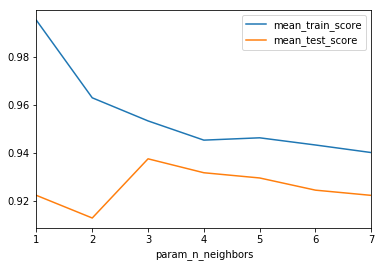

In [351]:
results[['mean_train_score','mean_test_score','param_n_neighbors']].plot(x='param_n_neighbors')b

In [352]:
knn_gs.score(X_test, y_test)

0.92997811816192555

In [353]:
len(y_test.unique())

24

In [361]:
# find data where lat long is not null or 0, but postal code is null or 0
select_null_postal_code = """
SELECT id, latitude, longitude, postal_code
FROM business
WHERE (latitude IS NOT NULL AND longitude IS NOT NULL)
AND (latitude != 0 AND longitude != 0)
AND (postal_code IS NULL OR postal_code = 0)
"""

In [364]:
missing_postal_df = db.query_to_dataframe(select_null_postal_code)
missing_postal_df.head(2)

,id,latitude,longitude,postal_code
0,8202,37.738616,-122.468775,NaN
1,9328,37.716163,-122.441438,NaN


In [390]:
missing_postal_df['postal_code'] = knn_gs.predict(
    scaler.transform(
        missing_postal_df[['latitude','longitude']]
    )
)

In [391]:
missing_postal_df.head()

,id,latitude,longitude,postal_code
0,8202,37.738616,-122.468775,94127
1,9328,37.716163,-122.441438,94112
2,9358,37.739083,-122.485437,94116
3,9582,37.785632,-122.429794,94115
4,10011,37.759943,-122.421332,94110


In [394]:
update_values = ["({}, {})".format(i,j) for i,j in missing_postal_df[['id','postal_code']].values]

In [397]:
update_values = ', '.join(update_values)

In [398]:
update_with_predicted_postal = """
BEGIN;
UPDATE business AS b SET
postal_code = c.postal_code
FROM (values {}) as c(id, postal_code)
WHERE c.id = b.id;
COMMIT;
""".format(update_values)

In [399]:
db.query_to_dictionary(update_with_predicted_postal, fetch_res=False)

In [401]:
db.query_to_dataframe(select_null_postal_code)

""


# Data Analysis

Consider the `violation` table.


Answer these questions using sql:
1. How many violations are there?
- How many businesses committing violations?
- What's the average number of violations per business?

Answer these questions using python
1. Draw a plot of the violations count
- Is the average number of violations meaningful?
> Not really, the distribution is quite skewed
- draw a plot of the normalized cumulative violation counts. Can we discard the restaurants with few violations?
- where would you draw a threshold if you were to keep 90% of the violations?

Consider the `inspection` table.

Answer these questions using SQL:
1. What's the average score for the whole city?
- What's the average score per business?
- Does the score correlate with the number of inspections?
- Create a dataframe from a table with the following columns:
    business_id, average_score, number_of_inspections, number_of_violations
- Use pandas to do a scatter matrix plot of average_score, number_of_inspections, number_of_violations to check for correlations

### Postal Code Analysis

The town administration would like to know which zip code are the ones where they should focus the inspections.

Use the information contained in the `business` table as well as the previous tables to answer the following questions using SQL:

1. Count the number of businesses per zipcode and sort them by descending order
- Which are the top 5 zipcodes with the worst average score?
    - Restrict your analysis to the zipcodes with at least 50 businesses
    - Do a simple average of the inspections scores in the postal code
- Which are the top 5 zipcodes with the highest number of violations per restaurant?
    - Restrict your  analysis to the zipcodes with at least 50 businesses



## Final recommendation
Give a final recommendation on which 2 zipcodes should the administration focus and choose an appropriate plot to 